# K-means Clustering

K-means clustering can be used to select the most representative colors of an image and thus realize the compression of that image. Using K-means clustering, the image size can be compressed to **4~6 times** smaller.

In [2]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import scipy.misc
from scipy import linalg
from random import sample

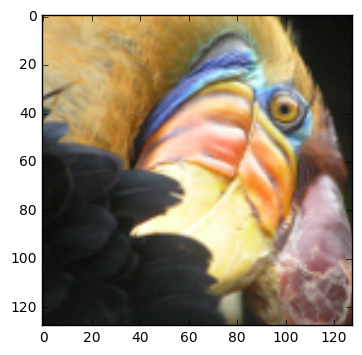

In [3]:
datafile = 'data/bird_small.png'
image = scipy.misc.imread(datafile)
plt.imshow(image)

In [4]:
image = image.reshape(-1,3)

In [5]:
image.shape

(16384, 3)

In [6]:
image = image/255

In [7]:
image[0]

array([ 0.85882353,  0.70588235,  0.40392157])

In [8]:
def assignColor(image, centroids, idx):
    for i in range(image.shape[0]):
        image[i] = centroids[int(idx[i])]
    return image

In [9]:
def newCentroids(myX, myidxs, num_centroids):
    subX = []
    for x in range(num_centroids):
        subX.append(np.array([myX[i] for i in range(myX.shape[0]) if myidxs[i] == x]))
    return np.array([np.mean(thisX,axis=0) for thisX in subX])

In [10]:
def clustering(image, curr_centroids):
    idx = np.zeros((image.shape[0],1))
    for i in range(image.shape[0]):
        mindist = 100000000
        for j in range(curr_centroids.shape[0]):
            dist = np.sum(np.square(image[i]-curr_centroids[j]))
            #if j==0:
                #mindist = dist
            if mindist>dist:
                mindist = dist
                idx[i] = j
    return idx

In [11]:
def kmeans(image, init_centroids, num_centroids, num_iter):
    curr_centroids = init_centroids
    for i in range(num_iter):
        idx = clustering(image, curr_centroids)
        curr_centroids = newCentroids(image, idx, num_centroids)
    return curr_centroids

In [12]:
def randomInitCentroids(image, num_centroids):
    idx = sample(range(0, image.shape[0]), num_centroids)
    init_centroids = np.array([image[i] for i in idx])
    return init_centroids

In [13]:
num_centroids = 16
num_iter = 10

In [14]:
init_centroids = randomInitCentroids(image, num_centroids)

In [15]:
centroids = kmeans(image, init_centroids, num_centroids, num_iter)

In [16]:
idx = clustering(image, centroids)

In [17]:
image2 = assignColor(image, centroids, idx)

In [18]:
image2 = image2.reshape(128,128,3)

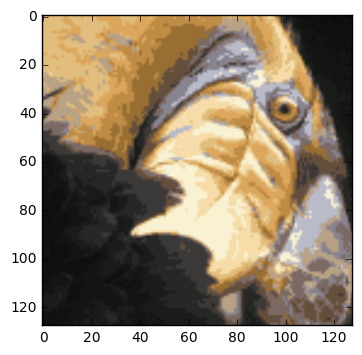

In [19]:
plt.imshow(image2)